# Imports

In [31]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [32]:
n = 5
label_name = "stat3"
layers = [2]

epochs = 3000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [33]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [34]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.4251838326454163
Epoch 1, Loss 1.431713342666626
Epoch 2, Loss 1.510917067527771
Epoch 3, Loss 1.42569237947464
Epoch 4, Loss 1.4398483633995056
Epoch 5, Loss 1.44418203830719
Epoch 6, Loss 1.4229222536087036
Epoch 7, Loss 1.4075899720191956
Epoch 8, Loss 1.4178516864776611
Epoch 9, Loss 1.442155361175537
Epoch 10, Loss 1.452013611793518
Epoch 11, Loss 1.40966135263443
Epoch 12, Loss 1.416918694972992
Epoch 13, Loss 1.4272725582122803
Epoch 14, Loss 1.414065659046173
Epoch 15, Loss 1.411224365234375
Epoch 16, Loss 1.4004491567611694
Epoch 17, Loss 1.40179443359375
Epoch 18, Loss 1.4018393754959106
Epoch 19, Loss 1.3805420994758606
Epoch 20, Loss 1.4005740284919739
Epoch 21, Loss 1.4237892627716064
Epoch 22, Loss 1.3868901133537292
Epoch 23, Loss 1.3800731897354126
Epoch 24, Loss 1.381577730178833
Epoch 25, Loss 1.3555681705474854
Epoch 26, Loss 1.4185497164726257
Epoch 27, Loss 1.3626274466514587
Epoch 28, Loss 1.3849129676818848
Epoch 29, Loss 1.355154037475586
Epoch 3

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

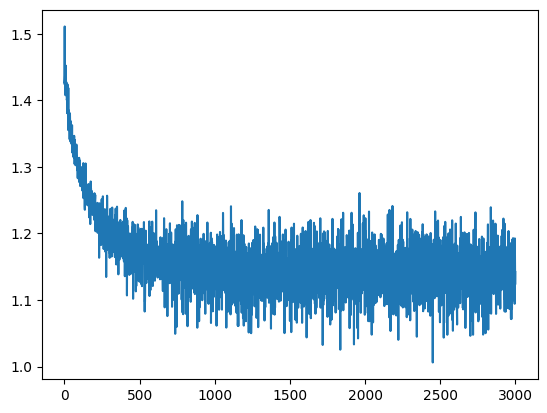

In [35]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

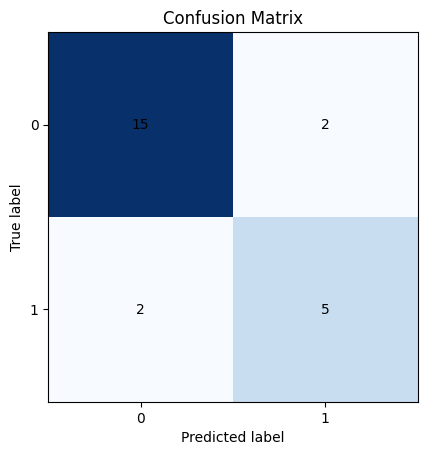

Accuracy for class 0 = 88.23529411764706%
Accuracy for class 1 = 71.42857142857143%
Overall accuracy = 83.33333333333333%


In [36]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

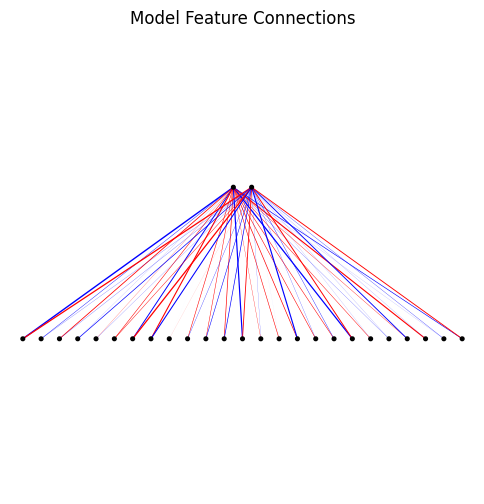

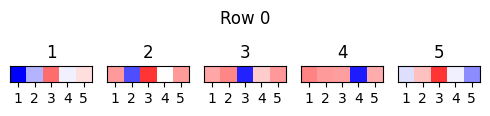

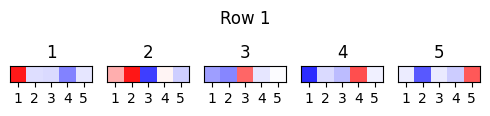

In [38]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)